In [1]:
 !pip install tensorflow==2.10.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.0/578.0 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 849.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 373.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 80.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 80.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 37.9 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attem

In [2]:
! python -V

Python 3.10.12


In [3]:
!pip install albumentations

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.0/224.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 25.4 MB/s eta 0:00:00


In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os
import random
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import pandas as pd
import matplotlib.cm as cm


In [5]:
tf.__version__

'2.10.0'

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# 시드 값 설정
SEED = 50

# 시드 고정
tf.random.set_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

In [8]:
normal_dir = '/content/drive/MyDrive/캡스톤/Data_3/normal'
adenocarcinoma_dir = '/content/drive/MyDrive/캡스톤/Data_3/adenocarcinoma'
large_cell_dir = '/content/drive/MyDrive/캡스톤/Data_3/large.cell.carcinoma'
squamous_cell_dir = '/content/drive/MyDrive/캡스톤/Data_3/squamous.cell.carcinoma'

# 이미지 파일 리스트 생성
normal_images = [os.path.join(normal_dir, fname) for fname in os.listdir(normal_dir) if fname.endswith(('.png', '.jpg', '.jpeg'))]
adenocarcinoma_images = [os.path.join(adenocarcinoma_dir, fname) for fname in os.listdir(adenocarcinoma_dir) if fname.endswith(('.png', '.jpg', '.jpeg'))]
large_cell_images = [os.path.join(large_cell_dir, fname) for fname in os.listdir(large_cell_dir) if fname.endswith(('.png', '.jpg', '.jpeg'))]
squamous_cell_images = [os.path.join(squamous_cell_dir, fname) for fname in os.listdir(squamous_cell_dir) if fname.endswith(('.png', '.jpg', '.jpeg'))]


# 데이터 셋 셔플
random.shuffle(normal_images)
random.shuffle(adenocarcinoma_images)
random.shuffle(large_cell_images)
random.shuffle(squamous_cell_images)


# 각 클래스에 대해 데이터를 학습, 검증, 테스트 셋으로 나눔
normal_train, normal_temp = train_test_split(normal_images, test_size=0.2, random_state=42)
normal_val, normal_test = train_test_split(normal_temp, test_size=0.5, random_state=42)

adenocarcinoma_train, adenocarcinoma_temp = train_test_split(adenocarcinoma_images, test_size=0.2, random_state=42)
adenocarcinoma_val, adenocarcinoma_test = train_test_split(adenocarcinoma_temp, test_size=0.5, random_state=42)

large_cell_train, large_cell_temp = train_test_split(large_cell_images, test_size=0.2, random_state=42)
large_cell_val, large_cell_test = train_test_split(large_cell_temp, test_size=0.5, random_state=42)

squamous_cell_train, squamous_cell_temp = train_test_split(squamous_cell_images, test_size=0.2, random_state=42)
squamous_cell_val, squamous_cell_test = train_test_split(squamous_cell_temp, test_size=0.5, random_state=42)

# 데이터셋 통합
train_data = normal_train + adenocarcinoma_train + large_cell_train + squamous_cell_train
train_labels = ([0] * len(normal_train) + [1] * len(adenocarcinoma_train) +
                [2] * len(large_cell_train) + [3] * len(squamous_cell_train))

val_data = normal_val + adenocarcinoma_val + large_cell_val + squamous_cell_val
val_labels = ([0] * len(normal_val) + [1] * len(adenocarcinoma_val) +
              [2] * len(large_cell_val) + [3] * len(squamous_cell_val))

test_data = normal_test + adenocarcinoma_test + large_cell_test + squamous_cell_test
test_labels = ([0] * len(normal_test) + [1] * len(adenocarcinoma_test) +
               [2] * len(large_cell_test) + [3] * len(squamous_cell_test))

# 데이터셋 섞기
train_dataset = list(zip(train_data, train_labels))
random.shuffle(train_dataset)
train_data, train_labels = zip(*train_dataset)

val_dataset = list(zip(val_data, val_labels))
random.shuffle(val_dataset)
val_data, val_labels = zip(*val_dataset)

test_dataset = list(zip(test_data, test_labels))
random.shuffle(test_dataset)
test_data, test_labels = zip(*test_dataset)

# 이미지 전처리 및 데이터 증강 정의
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

# 레이블을 문자열로 변환 (네 가지 클래스로 설정)
train_labels = ['Normal' if label == 0 else
                'Adenocarcinoma' if label == 1 else
                'Large_cell_carcinoma' if label == 2 else
                'Squamous_cell_carcinoma' for label in train_labels]

val_labels = ['Normal' if label == 0 else
              'Adenocarcinoma' if label == 1 else
              'Large_cell_carcinoma' if label == 2 else
              'Squamous_cell_carcinoma' for label in val_labels]

test_labels = ['Normal' if label == 0 else
               'Adenocarcinoma' if label == 1 else
               'Large_cell_carcinoma' if label == 2 else
               'Squamous_cell_carcinoma' for label in test_labels]

# train, val, test 데이터셋을 ImageDataGenerator의 flow 메서드를 통해 불러오기
def path_label_to_dataframe(paths, labels):
    return pd.DataFrame({'filename': paths, 'class': labels})

train_df = path_label_to_dataframe(train_data, train_labels)
val_df = path_label_to_dataframe(val_data, val_labels)
test_df = path_label_to_dataframe(test_data, test_labels)

# ImageDataGenerator를 통해 데이터를 불러올 때 class_mode='categorical'로 설정
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='filename',
    y_col='class',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'  # 'categorical'로 변경
)

val_generator = val_test_datagen.flow_from_dataframe(
    val_df,
    x_col='filename',
    y_col='class',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'  # 'categorical'로 변경
)

test_generator = val_test_datagen.flow_from_dataframe(
    test_df,
    x_col='filename',
    y_col='class',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  # 'categorical'로 변경
    shuffle=False
)



Found 731 validated image filenames belonging to 4 classes.
Found 91 validated image filenames belonging to 4 classes.
Found 93 validated image filenames belonging to 4 classes.


기존코드

In [16]:
# ResNet50 모델 구성 (이미지넷 가중치 사용)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False  # 기본 가중치는 고정

# 모델 구성
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(4, activation='softmax')  # 4개의 클래스를 위한 softmax 출력층
])

# 모델 컴파일 (Learning Rate 조정 없이 기본 설정 사용)
optimizer = tf.keras.optimizers.Adam()  # 기본 Learning Rate = 0.001
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# 체크포인트 콜백 (validation accuracy가 가장 높은 모델을 저장)
checkpoint = ModelCheckpoint('best_resnet_model.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# 클래스 가중치 계산
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(train_labels), y=train_labels)
class_weights_dict = dict(enumerate(class_weights))

In [17]:
# 모델 학습
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=val_generator,
    class_weight=class_weights_dict,
    callbacks=[checkpoint]
)

Epoch 1/100
23/23 [==============================] - ETA: 0s - loss: 1.1275 - accuracy: 0.4747
Epoch 1: val_accuracy improved from -inf to 0.18681, saving model to best_resnet_model.h5
23/23 [==============================] - 24s 875ms/step - loss: 1.1275 - accuracy: 0.4747 - val_loss: 1.5335 - val_accuracy: 0.1868
Epoch 2/100
23/23 [==============================] - ETA: 0s - loss: 0.9584 - accuracy: 0.5157
Epoch 2: val_accuracy improved from 0.18681 to 0.27473, saving model to best_resnet_model.h5
23/23 [==============================] - 20s 814ms/step - loss: 0.9584 - accuracy: 0.5157 - val_loss: 1.3199 - val_accuracy: 0.2747
Epoch 3/100
23/23 [==============================] - ETA: 0s - loss: 0.8780 - accuracy: 0.5650
Epoch 3: val_accuracy improved from 0.27473 to 0.35165, saving model to best_resnet_model.h5
23/23 [==============================] - 20s 831ms/step - loss: 0.8780 - accuracy: 0.5650 - val_loss: 1.2251 - val_accuracy: 0.3516
Epoch 4/100
23/23 [========================

In [18]:
# 평가
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

3/3 [==============================] - 2s 551ms/step - loss: 0.4258 - accuracy: 0.7957
Test Loss: 0.42584481835365295, Test Accuracy: 0.7956989407539368


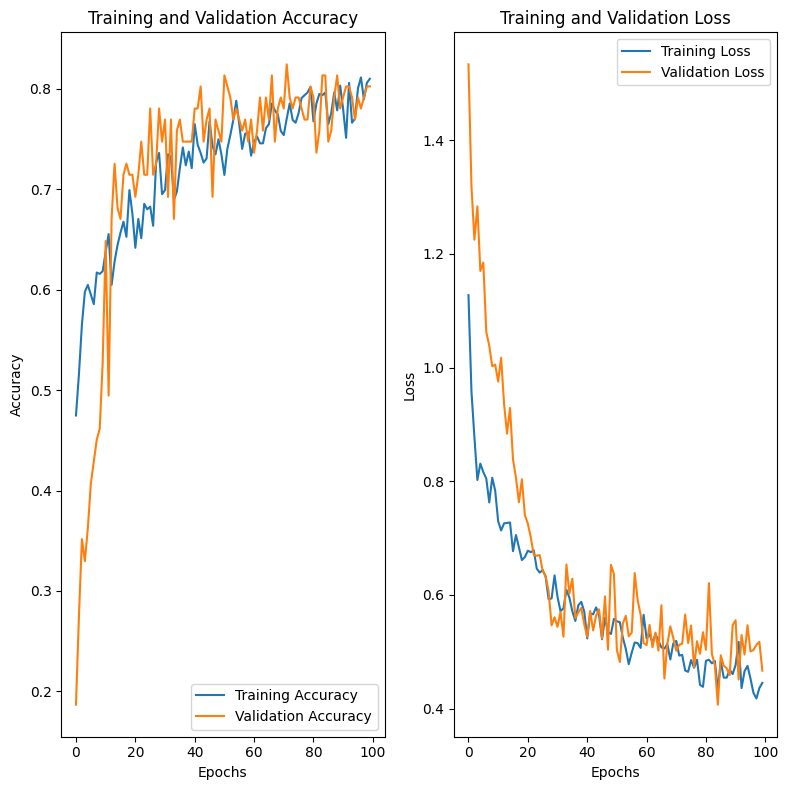

In [19]:
# 학습 결과 시각화
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# 그래프 그리기
plt.figure(figsize=(8, 8))

# Accuracy 그래프
plt.subplot(1, 2, 1)
plt.plot(range(len(acc)), acc, label='Training Accuracy')
plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Loss 그래프
plt.subplot(1, 2, 2)
plt.plot(range(len(loss)), loss, label='Training Loss')
plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

3/3 [==============================] - 3s 549ms/step


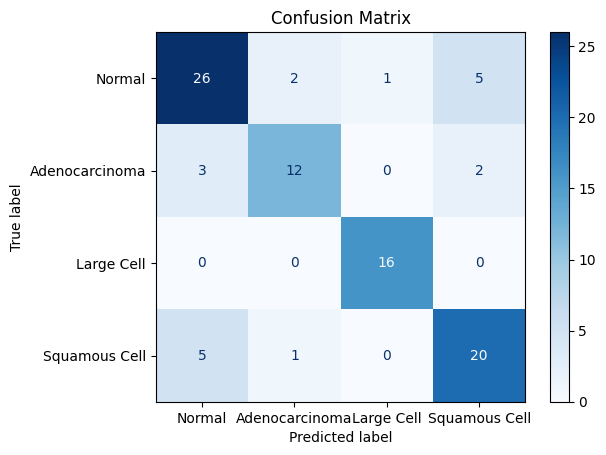

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# 테스트 데이터에 대한 예측
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # 가장 높은 확률을 가진 클래스를 선택

# 실제 레이블과 예측된 레이블을 가져옴
y_true = test_generator.classes

# 혼동 행렬 계산
cm = confusion_matrix(y_true, y_pred_classes)

# 혼동 행렬 시각화 (4개의 클래스에 맞게 레이블 수정)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Adenocarcinoma', 'Large Cell', 'Squamous Cell'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [23]:
model.save('trained_model_ResNet50_4class.h5')

In [24]:
from google.colab import files
files.download('trained_model_ResNet50_4class.h5')  # from colab to browser download

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>